In [30]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import model_selection
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
df =  pd.read_csv("joined_data_refined.csv",
                         keep_default_na=False, na_values=[""])

['Unnamed: 0', 'Store', 'Dept', 'Size', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday', 'Type_A', 'Type_B', 'Type_C', 'month', 'quarter', 'dayofweek_name', 'is_weekend']


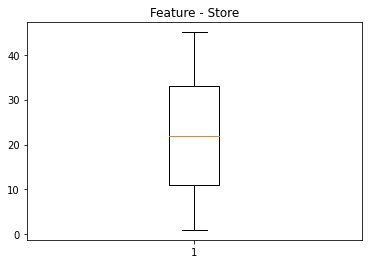

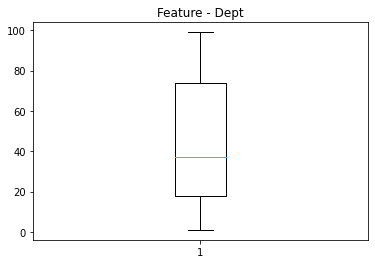

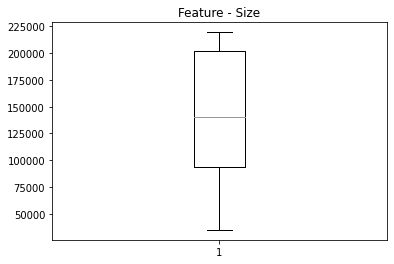

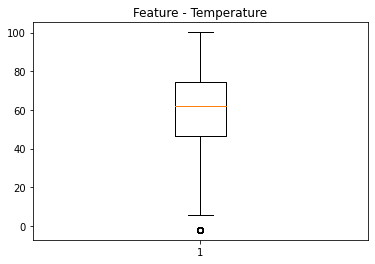

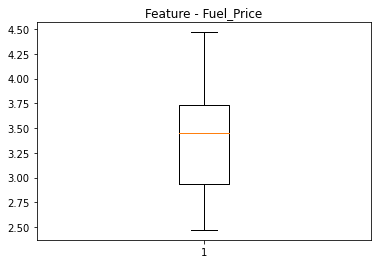

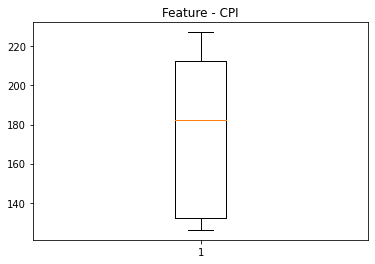

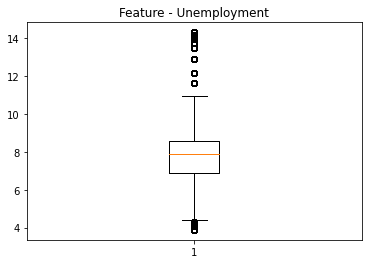

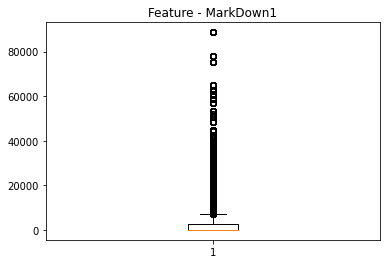

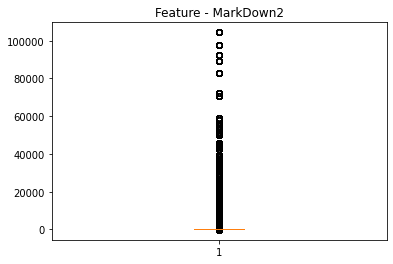

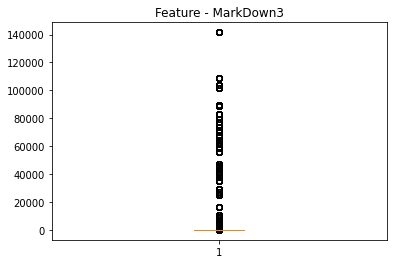

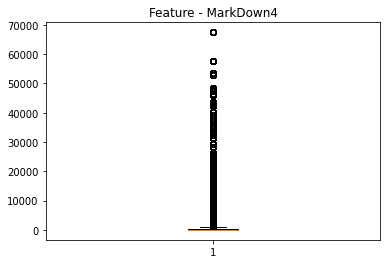

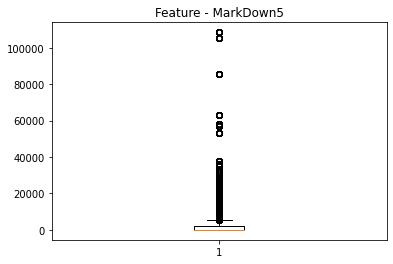

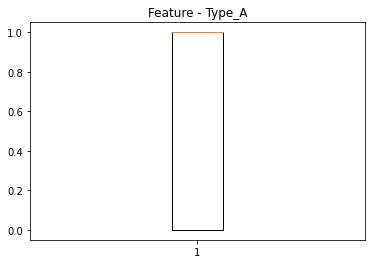

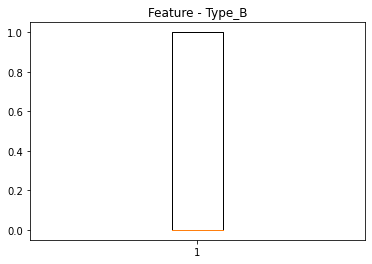

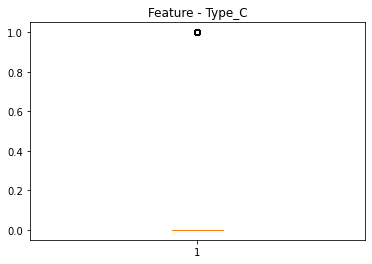

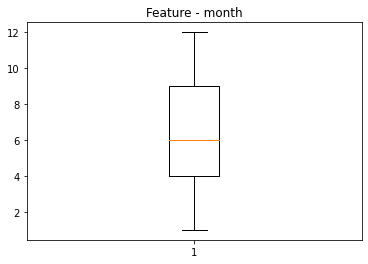

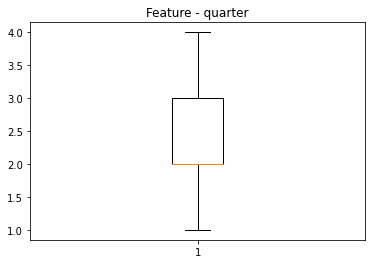

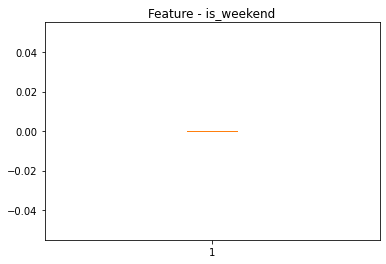

In [32]:
cols = list(df.columns)
print(cols)
cols.remove('Weekly_Sales')
cols.remove('IsHoliday')
cols.remove('dayofweek_name')
cols.remove('Date')
cols.remove('Unnamed: 0')
for each in  cols:
    plt.boxplot(df[each])
    plt.title('Feature - {}'.format(each))
    plt.show()

In [10]:
for col in cols:
    quantiles = df[col].quantile([0.25,0.5,0.75])
    quantiles = list(quantiles.values)
    Q1=quantiles[0]
    Q3=quantiles[2]
    IQR = Q3-Q1
    l_bound = Q1-1.5*IQR
    u_bound = Q3+1.5*IQR
    print(col)
    print(quantiles)
    print('Number of Outlier - '+str(len(df[(df[col]>u_bound)|(df[col]<l_bound)][col])))
#     o_index = df[(df[col]>u_bound)|(df[col]<l_bound)].index
#     mean_outlier = df[df.index.isin(o_index)]['Weekly_Sales'].mean()
#     mean_no_outlier= df[~df.index.isin(o_index)]['Weekly_Sales'].mean()
#     x=[col+'_outlier_mean', col+'_without_outliers_mean']
#     y=[mean_outlier, mean_no_outlier]
#     plt.bar(x,y)
#     plt.title('Mean target considering outlier concept for feature {}'.format(each))
#     plt.show()
#     df[col+'_outlier_impact']=np.where(df.index.isin(o_index),1,0)
#     df[df.index.isin(o_index)][col]=df[~df.index.isin(o_index)][col].mean()

Store
[11.0, 22.0, 33.0]
Number of Outlier - 0
Dept
[18.0, 37.0, 74.0]
Number of Outlier - 0
Size
[93638.0, 140167.0, 202505.0]
Number of Outlier - 0
Temperature
[46.68, 62.09, 74.28]
Number of Outlier - 67
Fuel_Price
[2.933, 3.452, 3.738]
Number of Outlier - 0
CPI
[132.0226667, 182.3509895, 212.445487]
Number of Outlier - 0
Unemployment
[6.891, 7.866, 8.567]
Number of Outlier - 32044
MarkDown1
[0.0, 0.0, 2809.05]
Number of Outlier - 55617
MarkDown2
[0.0, 0.0, 2.4]
Number of Outlier - 101683
MarkDown3
[0.0, 0.0, 4.54]
Number of Outlier - 84428
MarkDown4
[0.0, 0.0, 425.29]
Number of Outlier - 78886
MarkDown5
[0.0, 0.0, 2168.04]
Number of Outlier - 40329
Type_A
[0.0, 1.0, 1.0]
Number of Outlier - 0
Type_B
[0.0, 0.0, 1.0]
Number of Outlier - 0
Type_C
[0.0, 0.0, 0.0]
Number of Outlier - 42464
month
[4.0, 6.0, 9.0]
Number of Outlier - 0
quarter
[2.0, 2.0, 3.0]
Number of Outlier - 0
is_weekend
[0.0, 0.0, 0.0]
Number of Outlier - 0


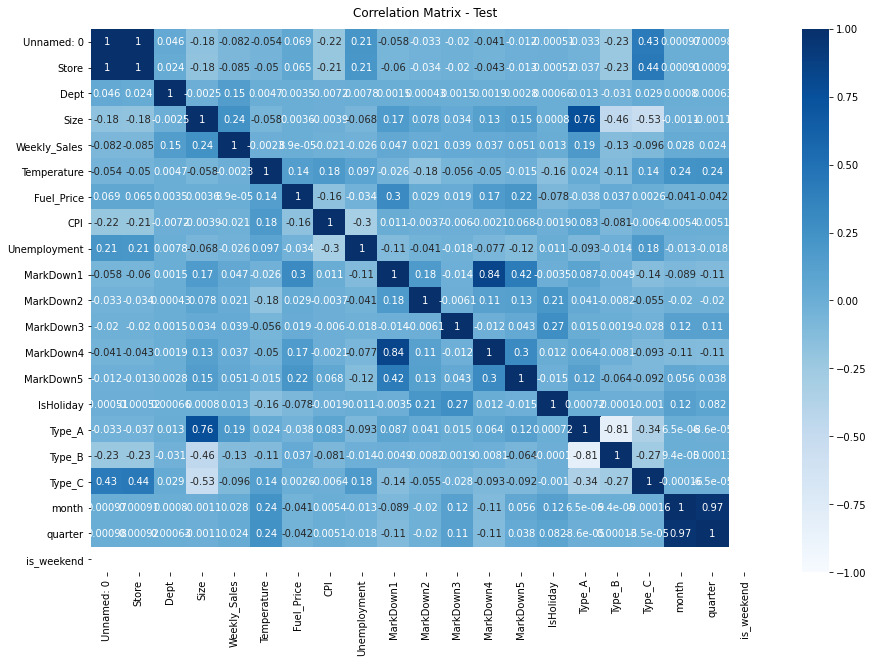

In [33]:
plt.figure(figsize=(15, 10))

# del df['Unnamed: 0']
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - Test', fontdict={'fontsize':12}, pad=12);

In [34]:
# for col in cols:
#     plt.figure()
#     plt.scatter(df[col] , df['Weekly_Sales'])
#     plt.ylabel('weeklySales')
#     plt.xlabel(col)

In [28]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot(y=df.Weekly_Sales, x=df['Type'], ax=fig.add_subplot(gs[0,0]))
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Type', fontsize=16)
sns.stripplot(y=train_detail.Weekly_Sales, x=train_detail[feature], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('Sales', fontsize=16)
plt.xlabel(feature, fontsize=16)
fig.show()

KeyError: 'Type'

<Figure size 1440x576 with 0 Axes>

In [41]:
from sklearn.feature_selection import f_regression,mutual_info_regression,SelectKBest
from sklearn.model_selection import train_test_split

X = df.copy()
del X['Weekly_Sales']
del X['Date']
del X['']
Y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sel_f = SelectKBest(f_regression,k=15).fit(X_train,y_train)
df.columns[sel_f.get_support()]

ValueError: could not convert string to float: 'Friday'